### Unit 1: Algorithmic Trading Strategies

### [Trading Vix](https://quantstrattrader.wordpress.com/)

- Momentum Strategies
- Mean Reversion Strategies
- Pair Trading
- Statistical Arbitrages
- Event Arbitrages
- News Based Trading


### Unit 2: Pair Trading

In [126]:
%config Completer.use_jedi = False

In [12]:
pairs = [["KO", "PEP"], ["RNL", "UG"], ["XOM", "CVX"]]
tf = ["2015-01-02", "2015-11-26"]
sum(pairs, [])

['KO', 'PEP', 'RNL', 'UG', 'XOM', 'CVX']

In [54]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

In [15]:
df = pdr.DataReader(sum(pairs,[]), data_source="yahoo", start=tf[0], end=tf[1]  )['Adj Close']

In [16]:
df

Symbols,KO,PEP,UG,XOM,CVX,RNL
Date,,,,,,
2015-01-02,35.491245,80.964714,15.096222,75.439079,90.693550,NaN
2015-01-05,35.491245,80.356018,14.855739,73.374931,87.068390,NaN
2015-01-06,35.760750,79.747322,14.879011,72.984848,87.028099,NaN
2015-01-07,36.207142,82.079216,14.669559,73.724373,86.955597,NaN
2015-01-08,36.645096,83.570938,14.638526,74.951500,88.945412,NaN
...,...,...,...,...,...,...
2015-11-19,37.231300,88.431473,14.635066,67.495033,76.490318,NaN
2015-11-20,36.644028,87.704231,14.714391,67.066353,74.957657,NaN
2015-11-23,37.101749,88.361351,14.928561,67.478218,75.799789,NaN


In [67]:
dfp = df[pairs[0]]

In [68]:
dfp['diff'] = dfp['KO'] - dfp["PEP"]

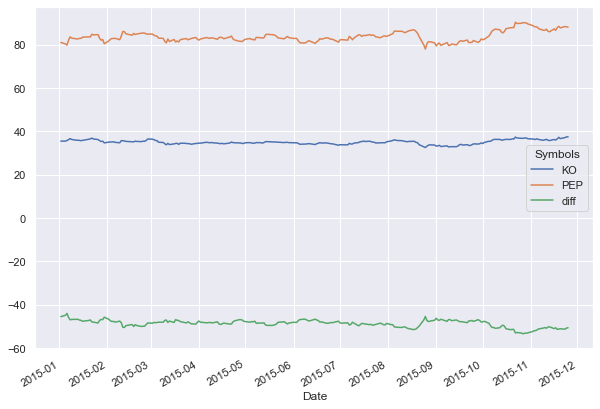

In [69]:
dfp.plot()

In [70]:
dfp[["KO", "PEP"]].corr()

Symbols,KO,PEP
Symbols,,
KO,1.00000,0.84212
PEP,0.84212,1.00000


In [71]:
dfp['mva'] = dfp['diff'].expanding(1).mean()
dfp['mvstd'] = dfp['diff'].expanding(1).std()
dfp.head()

Symbols,KO,PEP,diff,mva,mvstd
Date,,,,,
2015-01-02,35.491245,80.964714,-45.473469,-45.473469,NaN
2015-01-05,35.491245,80.356018,-44.864773,-45.169121,0.430413
2015-01-06,35.760750,79.747322,-43.986572,-44.774938,0.747508
2015-01-07,36.207142,82.079216,-45.872074,-45.049222,0.820633
2015-01-08,36.645096,83.570938,-46.925842,-45.424546,1.099736


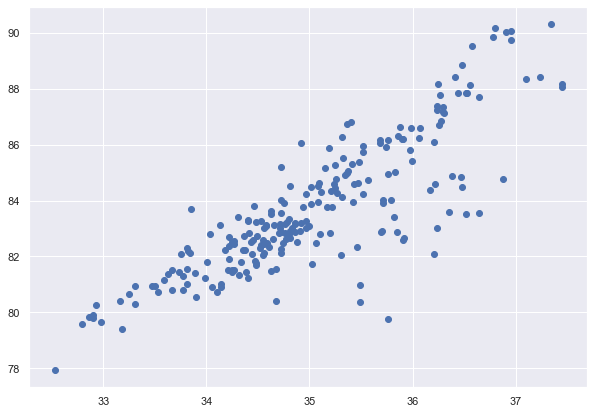

In [74]:
plt.plot(dfp['KO'], dfp['PEP'], 'bo')

In [76]:
import statsmodels.api as sm

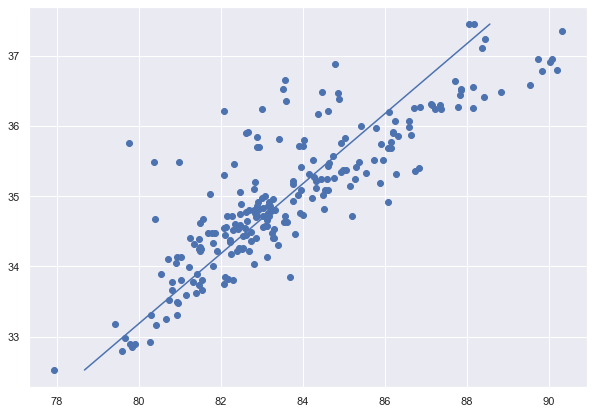

In [121]:
res = sm.OLS(dfp['PEP'], sm.add_constant(dfp['KO'])).fit()
x = dfp['KO'].sort_values(ascending=True)
X = sm.add_constant(x)
y = res.predict(X)
plt.plot(y,x)
plt.plot(dfp['PEP'], dfp['KO'], 'bo')

In [123]:
dfr = dfp.drop(['diff', 'mva', 'mvstd'], axis=1)

In [127]:
import statsmodels as stm

In [130]:
dfr.columns = ['Coke', 'Pepsi']

In [131]:
dfr

,Coke,Pepsi
Date,,
2015-01-02,35.491245,80.964714
2015-01-05,35.491245,80.356018
2015-01-06,35.760750,79.747322
2015-01-07,36.207142,82.079216
2015-01-08,36.645096,83.570938
...,...,...
2015-11-19,37.231300,88.431473
2015-11-20,36.644028,87.704231
2015-11-23,37.101749,88.361351


## Algorithmic Trading with Neural Networks